In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values


# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    #filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '../../dataset/UCI_HAR/UCI HAR Dataset/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '../../dataset/UCI_HAR/UCI HAR Dataset/')
    
    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    #one hot encode y
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [3]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

(7352, 128, 6) (7352, 1) (7352, 6) (2947, 128, 6) (2947, 1) (2947, 6)


In [4]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 6)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 6)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [5]:
print("0: Walking:" ,np.where(trainy == 0)[0].size)
print("1: WU:" ,np.where(trainy == 1)[0].size)
print("2: WD:" ,np.where(trainy == 2)[0].size)
print("3: Sitting:" ,np.where(trainy == 3)[0].size)
print("4: Standing:" ,np.where(trainy == 4)[0].size)
print("5: Laying:" ,np.where(trainy == 5)[0].size)

0: Walking: 1226
1: WU: 1073
2: WD: 986
3: Sitting: 1286
4: Standing: 1374
5: Laying: 1407


In [6]:
unique, counts = np.unique(trainy, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)   

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [7]:
X_train_all = trainX   # at this stage, the data includes both dynamic and static HAR data
y_train_all = trainy

X_test_all = testX
y_test_all = testy

In [8]:
import random

static_2 = np.where(trainy  == 0)[0]
static_3 = np.where(trainy == 1)[0]
static_4 = np.where(trainy  == 2)[0]

dynamic_3 = np.where(trainy == 3)[0]
dynamic_4 = np.where(trainy == 4)[0]
dynamic_5 = np.where(trainy == 5)[0]

static = np.concatenate([static_2, static_3, static_4])
static_list = static.tolist()

dynamic = np.concatenate([dynamic_3, dynamic_4, dynamic_5])
dynamic_list = dynamic.tolist()

# Shuffle dynamic data index
r = random.random()
random.shuffle(static_list, lambda: r)
random.shuffle(dynamic_list, lambda: r)

static = np.array(static_list)
dynamic = np.array(dynamic_list)

trainX_static = X_train_all[static]
trainy_static = y_train_all[static]

trainX_dynamic = X_train_all[dynamic]
trainy_dynamic = y_train_all[dynamic]

trainX_combined = X_train_all
trainy_combined = y_train_all

/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_84649/1208802571.py:19: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(static_list, lambda: r)
/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_84649/1208802571.py:20: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(dynamic_list, lambda: r)


In [9]:
static_2 = np.where(testy == 0)[0]
static_3 = np.where(testy == 1)[0]
static_4 = np.where(testy == 2)[0]
static = np.concatenate([static_2, static_3, static_4])
static_list = static.tolist()

dynamic_3 = np.where(testy == 3)[0]
dynamic_4 = np.where(testy == 4)[0]
dynamic_5 = np.where(testy == 5)[0]
dynamic = np.concatenate([dynamic_3, dynamic_4, dynamic_5])
dynamic_list = dynamic.tolist()

r = random.random()
random.shuffle(static_list, lambda: r)
random.shuffle(dynamic_list, lambda: r)

static = np.array(static_list)
dynamic = np.array(dynamic_list)

testX_static = X_test_all[static]
testy_static = y_test_all[static]

testX_dynamic = X_test_all[dynamic]
testy_dynamic = y_test_all[dynamic]

testX_combined = X_test_all
testy_combined = y_test_all

/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_84649/3041243064.py:14: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(static_list, lambda: r)
/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_84649/3041243064.py:15: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(dynamic_list, lambda: r)


In [10]:
print("Train 0_s: Walking:" ,np.where(testy_static == 0)[0].size)
print("Train1_s: WU:" ,np.where(testy_static == 1)[0].size)
print("Train2_s: WD:" ,np.where(testy_static == 2)[0].size)
print("Train3_s: Sitting:" ,np.where(testy_static == 3)[0].size)
print("Train4_s: Standing:" ,np.where(testy_static == 4)[0].size)
print("Train5_s: Laying:" ,np.where(testy_static == 5)[0].size) 

print("Test 0_s: Walking:" ,np.where(trainy_static == 0)[0].size)
print("Test 1_s: WU:" ,np.where(trainy_static == 1)[0].size)
print("Test 2_s: WD:" ,np.where(trainy_static == 2)[0].size)
print("Test 3_s: Sitting:" ,np.where(trainy_static == 3)[0].size)
print("Test 4_s: Standing:" ,np.where(trainy_static == 4)[0].size)
print("Test 5_s: Laying:" ,np.where(trainy_static == 5)[0].size) 

Train 0_s: Walking: 496
Train1_s: WU: 471
Train2_s: WD: 420
Train3_s: Sitting: 0
Train4_s: Standing: 0
Train5_s: Laying: 0
Test 0_s: Walking: 1226
Test 1_s: WU: 1073
Test 2_s: WD: 986
Test 3_s: Sitting: 0
Test 4_s: Standing: 0
Test 5_s: Laying: 0


In [11]:
print("Train 0_d: Walking:" ,np.where(testy_dynamic == 0)[0].size)
print("Train1_d: WU:" ,np.where(testy_dynamic == 1)[0].size)
print("Train2_d: WD:" ,np.where(testy_dynamic == 2)[0].size)
print("Train3_d: Sitting:" ,np.where(testy_dynamic == 3)[0].size)
print("Train4_d: Standing:" ,np.where(testy_dynamic == 4)[0].size)
print("Train5_d: Laying:" ,np.where(testy_dynamic == 5)[0].size) 

print("Test 0_d: Walking:" ,np.where(trainy_dynamic == 0)[0].size)
print("Test 1_d: WU:" ,np.where(trainy_dynamic == 1)[0].size)
print("Test 2_d: WD:" ,np.where(trainy_dynamic == 2)[0].size)
print("Test 3_d: Sitting:" ,np.where(trainy_dynamic == 3)[0].size)
print("Test 4_d: Standing:" ,np.where(trainy_dynamic == 4)[0].size)
print("Test 5_d: Laying:" ,np.where(trainy_dynamic == 5)[0].size) 

Train 0_d: Walking: 0
Train1_d: WU: 0
Train2_d: WD: 0
Train3_d: Sitting: 491
Train4_d: Standing: 532
Train5_d: Laying: 537
Test 0_d: Walking: 0
Test 1_d: WU: 0
Test 2_d: WD: 0
Test 3_d: Sitting: 1286
Test 4_d: Standing: 1374
Test 5_d: Laying: 1407


In [12]:
trainy_static_one_hot = to_categorical(trainy_static)
testy_static_one_hot = to_categorical(testy_static)

trainy_dynamic_one_hot = to_categorical(trainy_dynamic)
testy_dynamic_one_hot = to_categorical(testy_dynamic)

trainy_combined_one_hot = to_categorical(trainy)
testy_combined_one_hot = to_categorical(testy)

In [13]:
print("X train shape: ", trainX_static.shape)
print("Y train shape: ", trainy_static.shape)
print("Y train One hot shape: ", trainy_static_one_hot.shape)
print("X test shape: ", testX_static.shape)
print("Y test shape: ", testy_static.shape)
print("Y test One hot shape: ", testy_static_one_hot.shape)

X train shape:  (3285, 128, 6)
Y train shape:  (3285, 1)
Y train One hot shape:  (3285, 3)
X test shape:  (1387, 128, 6)
Y test shape:  (1387, 1)
Y test One hot shape:  (1387, 3)


In [14]:
print("X train shape: ", trainX_dynamic.shape)
print("Y train shape: ", trainy_dynamic.shape)
print("Y train One hot shape: ", trainy_dynamic_one_hot.shape)
print("X test shape: ", testX_dynamic.shape)
print("Y test shape: ", testy_dynamic.shape)
print("Y test One hot shape: ", testy_dynamic_one_hot.shape)

X train shape:  (4067, 128, 6)
Y train shape:  (4067, 1)
Y train One hot shape:  (4067, 6)
X test shape:  (1560, 128, 6)
Y test shape:  (1560, 1)
Y test One hot shape:  (1560, 6)


In [14]:
print("X train shape: ", trainX_combined.shape)
print("Y train shape: ", trainy_combined.shape)
print("Y train One hot shape: ", trainy_combined_one_hot.shape)
print("X test shape: ", testX_combined.shape)
print("Y test shape: ", testy_combined.shape)
print("Y test One hot shape: ", testy_combined_one_hot.shape)

X train shape:  (7352, 128, 6)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 6)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [15]:
unique, counts = np.unique(trainy_static, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy_static, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)  

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]]


In [16]:
unique, counts = np.unique(trainy_dynamic, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy_dynamic, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)  

Train data label statistics::
[[   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  3 491]
 [  4 532]
 [  5 537]]


In [17]:
unique, counts = np.unique(trainy_combined, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(testy_combined, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)  

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [15]:
from sklearn.model_selection import train_test_split

X_train_static,X_val_static,y_train_static_one_hot,y_val_static_one_hot,y_train_static,y_val_static=train_test_split(trainX_static, trainy_static_one_hot, trainy_static,test_size=0.2,random_state=100)

In [16]:
from sklearn.model_selection import train_test_split

X_train_dynamic,X_val_dynamic,y_train_dynamic_one_hot,y_val_dynamic_one_hot,y_train_dynamic,y_val_dynamic=train_test_split(trainX_dynamic, trainy_dynamic_one_hot, trainy_dynamic,test_size=0.2,random_state=100)

In [17]:
from sklearn.model_selection import train_test_split

X_train_combined,X_val_combined,y_train_combined_one_hot,y_val_combined_one_hot,y_train_combined,y_val_combined=train_test_split(trainX_combined, trainy_combined_one_hot, trainy_combined,test_size=0.2,random_state=100)

In [18]:
X_train_combined.shape, y_train_combined.shape, testX_combined.shape, testy_combined.shape

((5881, 128, 6), (5881, 1), (2947, 128, 6), (2947, 1))

In [19]:
n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic = X_train_dynamic.shape[1], X_train_dynamic.shape[2], testy_dynamic_one_hot.shape[1]


In [20]:
n_timesteps_static, n_features_static, n_outputs_static = X_train_static.shape[1], X_train_static.shape[2], testy_static_one_hot.shape[1]


In [24]:
n_timesteps_combined, n_features_combined, n_outputs_combined = X_train_combined.shape[1], X_train_combined.shape[2], testy_combined_one_hot.shape[1]


In [25]:
n_timesteps_static, n_features_static, n_outputs_static, n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic, n_timesteps_combined, n_features_combined, n_features_combined

(128, 6, 3, 128, 6, 6, 128, 6, 6)

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D
from tensorflow.keras.layers import concatenate
from keras.utils import to_categorical

# Model

In [27]:
def CNN(n_timesteps, n_features, n_outputs, inputs):
    ##Level_1
    # layer 1
    inputs1_1= Input(shape=(n_timesteps,n_features))##128,9
    conv1_1 = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs1_1) ##none,126,128
    # layer 2
    inputs1_2= Input(shape=(n_timesteps,n_features))
    conv1_2 = Conv1D(filters=128, kernel_size=5, activation='relu')(inputs1_2)##124,128
    # layer 3
    inputs1_3= Input(shape=(n_timesteps,n_features))
    conv1_3 = Conv1D(filters=128, kernel_size=7, activation='relu')(inputs1_3)##122,128
    # layer 4
    inputs1_4= Input(shape=(n_timesteps,n_features))
    conv1_4 = Conv1D(filters=128, kernel_size=9, activation='relu')(inputs1_4)##120,128

    # merge1
    merged_1 = concatenate([conv1_1,conv1_2,conv1_3,conv1_4],axis=1)

    #maxpool1
    pool_1=MaxPooling1D(pool_size=5)(merged_1)

    ##Level_2
    # layer 1
    conv2_1 = Conv1D(filters=64, kernel_size=3, activation='relu')(pool_1)
    # layer 2
    conv2_2 = Conv1D(filters=64, kernel_size=5, activation='relu')(pool_1)
    # layer 3
    conv2_3 = Conv1D(filters=64, kernel_size=7, activation='relu')(pool_1)
    # layer 4

    conv2_4 = Conv1D(filters=64, kernel_size=9, activation='relu')(pool_1) 
    # merge2
    merged_2 = concatenate([conv2_1,conv2_2,conv2_3,conv2_4],axis=1)

    #maxpool2
    pool_2=MaxPooling1D(pool_size=5)(merged_2)


    ##Level_3
    # layer 1
    conv3_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(pool_2)
    # layer 2
    conv3_2 = Conv1D(filters=32, kernel_size=5, activation='relu')(pool_2)
    # layer 3
    conv3_3 = Conv1D(filters=32, kernel_size=7, activation='relu')(pool_2)
    # layer 4

    conv3_4 = Conv1D(filters=32, kernel_size=9, activation='relu')(pool_2) 
    # merge2
    merged_3 = concatenate([conv3_1,conv3_2,conv3_3,conv3_4],axis=1)

    #maxpool2
    pool_3=MaxPooling1D(pool_size=5)(merged_3)


    #flatten
    flat_cnn=Flatten()(pool_3)

    ##dense layer
    dense = Dense(512, activation='relu')(flat_cnn)
    outputs = Dense(n_outputs, activation='softmax')(dense)

    ##MODEL
    cnn3_model = Model([inputs1_1, inputs1_2, inputs1_3,inputs1_4], outputs)

    return cnn3_model

cnn3_model_static = CNN(n_timesteps_static, n_features_static, n_outputs_static, [X_train_static, X_train_static, X_train_static, X_train_static])

cnn3_model_static.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn3_model_static.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 6)]     0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128, 6)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 128, 6)]     0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 128, 6)]     0           []                               
                                                                                              

# Static

In [28]:
# fit network
model_static_history=cnn3_model_static.fit(x=[X_train_static,X_train_static,X_train_static,X_train_static], y=y_train_static_one_hot, epochs=100, batch_size=32,validation_data= ([X_val_static, X_val_static, X_val_static, X_val_static], y_val_static_one_hot))

Epoch 1/30
83/83 [==============================] - 8s 77ms/step - loss: 0.4722 - accuracy: 0.7922 - val_loss: 0.1997 - val_accuracy: 0.9322
Epoch 2/30
83/83 [==============================] - 6s 67ms/step - loss: 0.0424 - accuracy: 0.9848 - val_loss: 0.2056 - val_accuracy: 0.9409
Epoch 3/30
83/83 [==============================] - 5s 66ms/step - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.1851 - val_accuracy: 0.9495
Epoch 4/30
83/83 [==============================] - 5s 62ms/step - loss: 9.3074e-04 - accuracy: 1.0000 - val_loss: 0.2062 - val_accuracy: 0.9618
Epoch 5/30
83/83 [==============================] - 5s 65ms/step - loss: 3.4228e-04 - accuracy: 1.0000 - val_loss: 0.2461 - val_accuracy: 0.9596
Epoch 6/30
83/83 [==============================] - 6s 72ms/step - loss: 2.2733e-04 - accuracy: 1.0000 - val_loss: 0.2519 - val_accuracy: 0.9625
Epoch 7/30
83/83 [==============================] - 5s 65ms/step - loss: 1.5120e-04 - accuracy: 1.0000 - val_loss: 0.2531 - val_accuracy: 0.96

# Dynamic

In [29]:
cnn3_model_dynamic = CNN(n_timesteps_dynamic, n_features_dynamic, n_outputs_dynamic, [X_train_dynamic, X_train_dynamic, X_train_dynamic, X_train_dynamic])

cnn3_model_dynamic.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn3_model_dynamic.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 6)]     0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 128, 6)]     0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 128, 6)]     0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 128, 6)]     0           []                               
                                                                                            

In [30]:
# fit network
model_dynamic_history=cnn3_model_dynamic.fit(x=[X_train_dynamic,X_train_dynamic,X_train_dynamic,X_train_dynamic], y=y_train_dynamic_one_hot, epochs=100, batch_size=32,validation_data= ([X_val_dynamic, X_val_dynamic, X_val_dynamic, X_val_dynamic], y_val_dynamic_one_hot))

Epoch 1/30
102/102 [==============================] - 9s 75ms/step - loss: 0.2749 - accuracy: 0.8829 - val_loss: 0.3718 - val_accuracy: 0.8744
Epoch 2/30
102/102 [==============================] - 8s 81ms/step - loss: 0.1969 - accuracy: 0.9152 - val_loss: 0.4137 - val_accuracy: 0.8731
Epoch 3/30
102/102 [==============================] - 7s 68ms/step - loss: 0.1848 - accuracy: 0.9164 - val_loss: 0.4760 - val_accuracy: 0.8532
Epoch 4/30
102/102 [==============================] - 7s 66ms/step - loss: 0.1911 - accuracy: 0.9204 - val_loss: 0.3611 - val_accuracy: 0.8551
Epoch 5/30
102/102 [==============================] - 8s 79ms/step - loss: 0.1688 - accuracy: 0.9241 - val_loss: 0.5155 - val_accuracy: 0.8583
Epoch 6/30
102/102 [==============================] - 7s 68ms/step - loss: 0.1547 - accuracy: 0.9324 - val_loss: 0.6995 - val_accuracy: 0.8571
Epoch 7/30
102/102 [==============================] - 7s 72ms/step - loss: 0.1587 - accuracy: 0.9259 - val_loss: 0.4623 - val_accuracy: 0.8859

In [31]:
##MODEL
cnn3_model_combined = CNN(n_timesteps_combined, n_features_combined, n_outputs_combined, [X_train_combined, X_train_combined, X_train_combined, X_train_combined])

cnn3_model_combined.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn3_model_combined.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 128, 6)]     0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 128, 6)]     0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 128, 6)]     0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 128, 6)]     0           []                               
                                                                                            

In [32]:
# fit network
model_combined_history=cnn3_model_combined.fit(x=[X_train_combined,X_train_combined,X_train_combined,X_train_combined], y=y_train_combined_one_hot, epochs=100, batch_size=32,validation_data= ([X_val_combined, X_val_combined, X_val_combined, X_val_combined], y_val_combined_one_hot))

Epoch 1/30
184/184 [==============================] - 15s 76ms/step - loss: 0.3515 - accuracy: 0.8558 - val_loss: 0.3250 - val_accuracy: 0.8955
Epoch 2/30
184/184 [==============================] - 13s 71ms/step - loss: 0.1399 - accuracy: 0.9446 - val_loss: 0.3794 - val_accuracy: 0.8945
Epoch 3/30
184/184 [==============================] - 13s 70ms/step - loss: 0.1123 - accuracy: 0.9534 - val_loss: 0.3026 - val_accuracy: 0.9091
Epoch 4/30
184/184 [==============================] - 14s 78ms/step - loss: 0.1022 - accuracy: 0.9561 - val_loss: 0.2908 - val_accuracy: 0.9067
Epoch 5/30
184/184 [==============================] - 13s 71ms/step - loss: 0.0954 - accuracy: 0.9589 - val_loss: 0.4011 - val_accuracy: 0.9023
Epoch 6/30
184/184 [==============================] - 13s 73ms/step - loss: 0.1327 - accuracy: 0.9476 - val_loss: 0.3053 - val_accuracy: 0.9036
Epoch 7/30
184/184 [==============================] - 13s 73ms/step - loss: 0.1001 - accuracy: 0.9570 - val_loss: 0.2968 - val_accuracy:

# Result

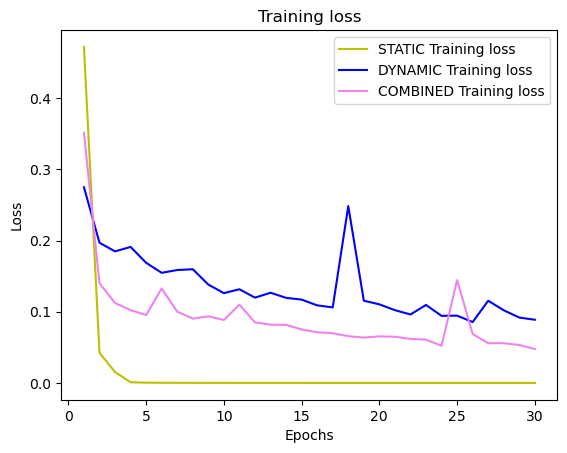

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

loss_static = model_static_history.history['loss']
loss_dynamic = model_dynamic_history.history['loss']
loss_combined = model_combined_history.history['loss']
epochs = range(1, len(loss_static) + 1)
plt.plot(epochs, loss_static, 'y', label='STATIC Training loss')
plt.plot(epochs, loss_dynamic, 'b', label='DYNAMIC Training loss')
plt.plot(epochs, loss_combined, color='violet', label='COMBINED Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

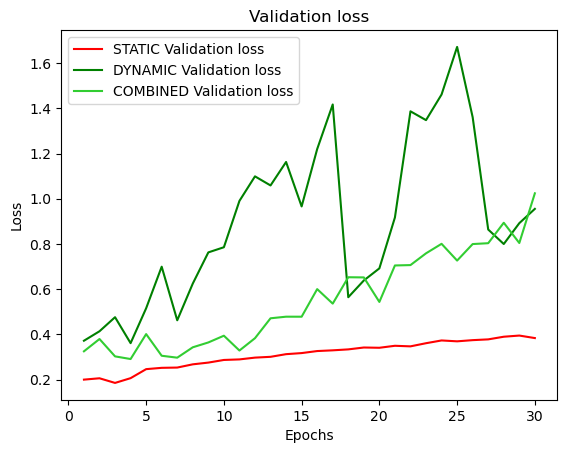

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

val_loss_static = model_static_history.history['val_loss']
val_loss_dynamic = model_dynamic_history.history['val_loss']
val_loss_combined = model_combined_history.history['val_loss']
epochs = range(1, len(loss_static) + 1)
plt.plot(epochs, val_loss_static, 'r', label='STATIC Validation loss')
plt.plot(epochs, val_loss_dynamic, 'g', label='DYNAMIC Validation loss')
plt.plot(epochs, val_loss_combined, color='limegreen', label='COMBINED Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

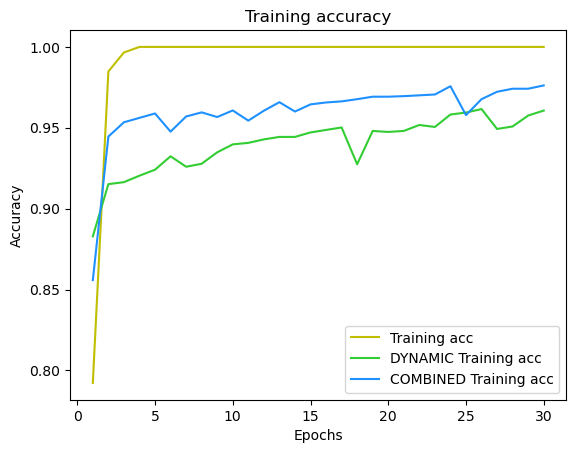

In [35]:
acc_static = model_static_history.history['accuracy']
acc_dynamic = model_dynamic_history.history['accuracy']
acc_combined = model_combined_history.history['accuracy']

plt.plot(epochs, acc_static, 'y', label='Training acc')
plt.plot(epochs, acc_dynamic, color='limegreen', label='DYNAMIC Training acc')
plt.plot(epochs, acc_combined, color='dodgerblue', label='COMBINED Training acc')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

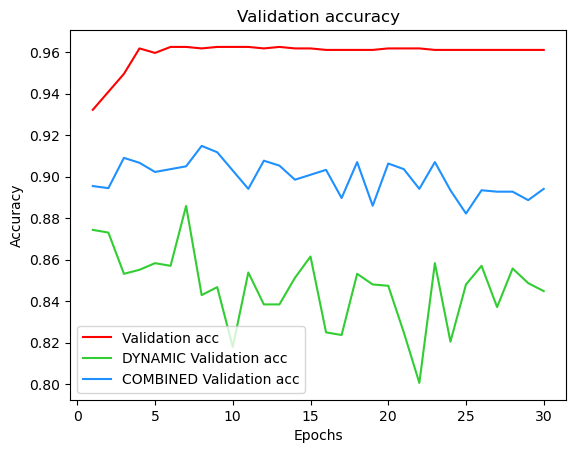

In [36]:
val_acc_static = model_static_history.history['val_accuracy']

val_acc_dynamic = model_dynamic_history.history['val_accuracy']

val_acc_combined = model_combined_history.history['val_accuracy']

plt.plot(epochs, val_acc_static, 'r', label='Validation acc')
plt.plot(epochs, val_acc_dynamic, color='limegreen', label='DYNAMIC Validation acc')
plt.plot(epochs, val_acc_combined, color='dodgerblue', label="COMBINED Validation acc")

plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

44/44 [==============================] - 1s 17ms/step
[[492   1   3]
 [ 26 421  24]
 [  0   0 420]]
0.9610670511896179
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       496
           1       1.00      0.89      0.94       471
           2       0.94      1.00      0.97       420

    accuracy                           0.96      1387
   macro avg       0.96      0.96      0.96      1387
weighted avg       0.96      0.96      0.96      1387



<Axes: >

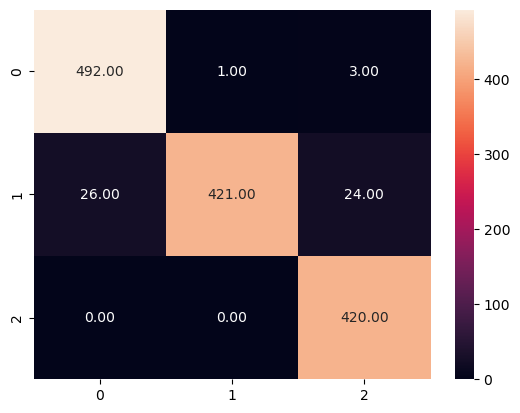

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred_static=cnn3_model_static.predict([testX_static,testX_static,testX_static,testX_static])
pred_static=np.argmax(pred_static, axis=-1)
cm_static=confusion_matrix(testy_static,pred_static)
print(cm_static)
print(accuracy_score(testy_static,pred_static))
print(classification_report(testy_static,pred_static))
sns.heatmap(cm_static, annot=True, fmt = '.2f')

49/49 [==============================] - 1s 17ms/step
[[348 140   3]
 [ 99 433   0]
 [  0   0 537]]
0.8448717948717949
              precision    recall  f1-score   support

           3       0.78      0.71      0.74       491
           4       0.76      0.81      0.78       532
           5       0.99      1.00      1.00       537

    accuracy                           0.84      1560
   macro avg       0.84      0.84      0.84      1560
weighted avg       0.85      0.84      0.84      1560



<Axes: >

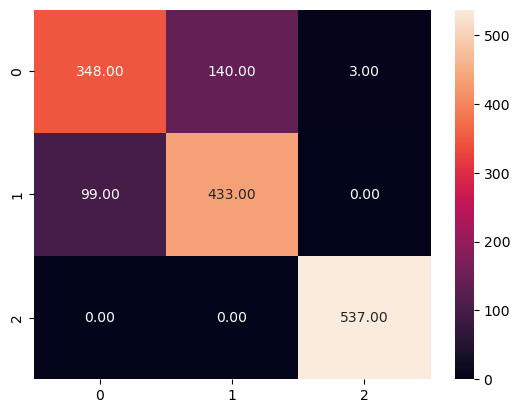

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred_dynamic=cnn3_model_dynamic.predict([testX_dynamic,testX_dynamic,testX_dynamic,testX_dynamic])
pred_dynamic=np.argmax(pred_dynamic, axis=-1)
cm_dynamic=confusion_matrix(testy_dynamic,pred_dynamic)
print(cm_dynamic)
print(accuracy_score(testy_dynamic,pred_dynamic))
print(classification_report(testy_dynamic,pred_dynamic))
sns.heatmap(cm_dynamic, annot=True, fmt = '.2f')

93/93 [==============================] - 2s 18ms/step
[[471   0  25   0   0   0]
 [ 26 421  24   0   0   0]
 [  1   0 419   0   0   0]
 [  0   9   0 355 127   0]
 [  0   0   0  73 459   0]
 [  0  10   0   0  17 510]]
0.8941296233457754
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       496
           1       0.96      0.89      0.92       471
           2       0.90      1.00      0.94       420
           3       0.83      0.72      0.77       491
           4       0.76      0.86      0.81       532
           5       1.00      0.95      0.97       537

    accuracy                           0.89      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.89      0.89      2947



<Axes: >

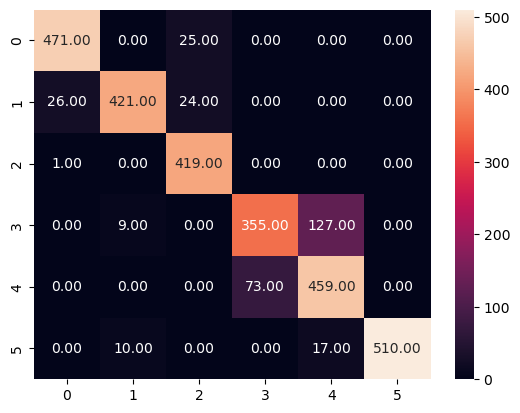

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred_combined=cnn3_model_combined.predict([testX_combined,testX_combined,testX_combined,testX_combined])
pred_combined=np.argmax(pred_combined, axis=-1)
cm_combined=confusion_matrix(testy_combined,pred_combined)
print(cm_combined)
print(accuracy_score(testy_combined,pred_combined))
print(classification_report(testy_combined,pred_combined))
sns.heatmap(cm_combined, annot=True, fmt = '.2f')

In [40]:
testX_static.shape, testy_static.shape, testX_combined.shape, testy_combined.shape

((1387, 128, 6), (1387, 1), (2947, 128, 6), (2947, 1))

In [41]:
score_static = cnn3_model_static.evaluate([testX_static,testX_static,testX_static,testX_static], testy_static_one_hot)
score_dynamic = cnn3_model_dynamic.evaluate([testX_dynamic,testX_dynamic,testX_dynamic,testX_dynamic], testy_dynamic_one_hot)
score_combined = cnn3_model_combined.evaluate([testX_combined,testX_combined,testX_combined,testX_combined], testy_combined_one_hot)

pd.DataFrame(score_static)

93/93 [==============================] - 2s 18ms/step - loss: 1.0242 - accuracy: 0.8941


,0
0,0.383568
1,0.961067


# Accuracy
### Static + Dynamic : 0.8941
### Static : 0.9611
### Dynamic : 0.8449

In [21]:
static_ratio = testX_static.shape[0] / testX.shape[0]
dynamic_ratio = testX_dynamic.shape[0] / testX.shape[0]

testX_static.shape[0], testX_dynamic.shape[0]

(1387, 1560)

### Accuracy

In [51]:
mod_acc = static_ratio * score_static[1] + dynamic_ratio * score_dynamic[1]
mod_acc

0.8995589000069573